For electronics-only problem, we could use:

\begin{equation}
H_{elec} \psi_{elec}= [\sum_{i=1}^{N}(-\frac{1}{2}\nabla^{2}_{i}) + \sum_{i=1}^{N}\sum_{j>i}^{N}(\frac{1}{r_{ij}}) + \sum_{i=1}^{N}\sum_{A=1}^{M}(\frac{- Z_A}{r_{iA}})] \psi_{elec} = E \psi_{elec}
\end{equation}

In part (b), we are dealing with two **interacting electrons** in a well (no nuclei), then we could drop the last term and get:

\begin{equation}
H_{elec} \psi_{elec}= [\sum_{i=1}^{N}(-\frac{1}{2}\nabla^{2}_{i}) + \sum_{i=1}^{N}\sum_{j>i}^{N}(\frac{1}{r_{ij}})] \psi_{elec} = E \psi_{elec}
\end{equation}

In part (a), we are assuming the electrons are **non-interacting**, so we could drop the last term and get:

\begin{equation}
H_{elec} \psi_{elec}= [\sum_{i=1}^{N}(-\frac{1}{2}\nabla^{2}_{i})] \psi_{elec} = E \psi_{elec}
\end{equation}

$\psi_{elec}$ is $\psi_{elec} (r_1, r_2) $ where $r_1$ and $r_2$ are position vector of electron 1 and 2 respectively.

For the part (a), we note that the overall wavefunction could be given by the product of the individual wavefunctions and total energy as the sum of the individual energies:

\begin{equation}
\psi_{elec} (r_i, r_j) = \psi_{elec} (r_i) \cdot \psi_{elec} (r_j) \\
E = E_i + E_j
\end{equation}

We have the solution from assignment 1:

>The energy levels, $E_n$, for each electron **($i$** or **$j$)**:

\begin{equation}
E_n = \frac {n^{2} \pi^{2}} {2L^{2}}
\end{equation}


> The wavefunctions, $\psi_{elec, n}$, for each electron **($i$** or **$j$)**:

\begin{equation}
\psi_{elec, n} = \sqrt {\frac {2}{L}} Sin(n\pi \frac {x}{L})  
\end{equation}

The one dimensional Schrodinger equation in **$x$** direction for indistinguishable electrons:

\begin{equation}
(-\frac{1}{2} \frac{{d^2}\psi_{elec}}{dx^2}) = E \psi_{elec}
\end{equation}

By discretization, we get ($i$ and $j$ are the index on the discretized 2D grid):

\begin{equation}
(-\frac{1}{2} \frac{\psi_{i-1,j} - 2\psi_{i,j} + \psi_{i+1,j}}{\Delta x^2})  + (-\frac{1}{2} \frac{\psi_{i,j+1} - 2\psi_{i,j} + \psi_{i,j-1}}{\Delta x^2}) = E \psi_{i,j}
\end{equation}

on an uniformly discretized grid with spacing $h$ of $N$ points:

\begin{equation}
(-\frac{1}{2} \frac{\psi_{i-1,j} - 2\psi_{i,j} + \psi_{i+1,j}}{h^2})  + (-\frac{1}{2} \frac{\psi_{i,j+1} - 2\psi_{i,j} + \psi_{i,j-1}}{h^2}) = E \psi_{i,j}
\end{equation}

That would look like:

\begin{equation}
\frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & \cdots & 0 & 0 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 & 0 & \cdots & 0 \\
0 & 1 & -2 & \ddots & \vdots & \vdots & \ddots & \vdots \\
\vdots & \vdots & \ddots & \ddots & 1 & 0 & \cdots & 0 \\
0 & \cdots & \cdots & 0 & 1 & -2 & 1 & 0 \\
0 & \cdots & \cdots & \cdots & 0 & 1 & -2 & 1 \\
0 & \cdots & \cdots & \cdots & \cdots & 0 & 1 & -2
\end{bmatrix}
\begin{bmatrix}
\psi_{1,1} \\
\psi_{2,1} \\
\vdots \\
\psi_{N-1,1} \\
\psi_{N,1} \\
\psi_{1,2} \\
\psi_{2,2} \\
\vdots \\
\psi_{N-1,2} \\
\psi_{N,2} \\
\vdots \\
\vdots \\
\vdots \\
\vdots \\
\vdots \\
\psi_{1,N} \\
\psi_{2,N} \\
\vdots \\
\psi_{N-1,N} \\
\psi_{N,N}
\end{bmatrix}
= E
\begin{bmatrix}
\psi_{1,1} \\
\psi_{2,1} \\
\vdots \\
\psi_{N-1,1} \\
\psi_{N,1} \\
\psi_{1,2} \\
\psi_{2,2} \\
\vdots \\
\psi_{N-1,2} \\
\psi_{N,2} \\
\vdots \\
\vdots \\
\vdots \\
\vdots \\
\vdots \\
\psi_{1,N} \\
\psi_{2,N} \\
\vdots \\
\psi_{N-1,N} \\
\psi_{N,N}
\end{bmatrix}
\end{equation}

Computing

In [ ]:
import numpy as np
from scipy.linalg import eigh
#
N = 50
L = 10
h = L / (N + 1)
#
A1 = -2 * np.eye(N) + np.eye(N, k=1) + np.eye(N, k=-1)
H1 = np.kron(np.eye(N), A1) + np.kron(A1, np.eye(N))
H1 /= h**2
#
eigenvalues1, eigenvectors1 = eigh(H1)

Sorting eigenvalues (and eigenvectors) ascending

In [ ]:
sorted_indices1 = np.argsort(eigenvalues1)
sorted_eigenvalues1 = eigenvalues1[sorted_indices1]
sorted_eigenvectors1 = eigenvectors1[:, sorted_indices1]

The first six wavefunctions are:

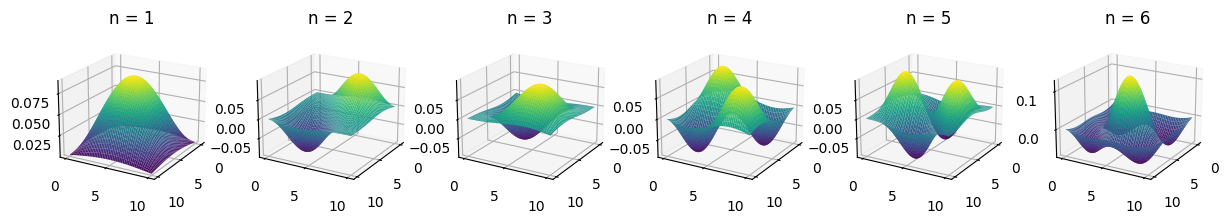

In [ ]:
import matplotlib.pyplot as plt
num_state = 6
x = np.linspace(0, L, N)
X, Y = np.meshgrid(x, x)
#
fig = plt.figure(figsize=(15, 5))
#
for state in range(6):
  eigenvector_i1 = sorted_eigenvectors1[:, state].reshape((N, N))
  eigenvector_i1 = np.sign(sorted_eigenvectors1[:, 0].reshape((N, N))) * eigenvector_i1
  #
  PSI1 = eigenvector_i1
  normalization_factor1 = np.sqrt(np.sum(np.abs(PSI1)**2) * h)
  PSI1 /= normalization_factor1
  #
  ax = fig.add_subplot(1, 6, state+1, projection='3d')
  ax.plot_surface(X, Y, PSI1, cmap='viridis')
  ax.set_title('n = 'f'{state+1}')
  ax.view_init(elev=20, azim=30)

In the case (b), including the Coulomb interaction between the two electrons in the Hamiltonian:

\begin{equation}
H = \sum_{i=1}^{2}(-\frac{1}{2}\nabla^{2}_{i}) + \sum_{i=1}^{2}\sum_{j>i}^{2}(\frac{1}{r_{ij}})
\end{equation}

on an uniformly discretized grid with spacing $h$ of $N$ points:

\begin{equation}
H = (-\frac{1}{2} \frac{\psi_{i-1,j} - 2\psi_{i,j} + \psi_{i+1,j}}{h^2})  + (-\frac{1}{2} \frac{\psi_{i,j+1} - 2\psi_{i,j} + \psi_{i,j-1}}{h^2}) +  \frac{1}{\sqrt((x_{1} - x_{2})^2)}
\end{equation}

In the matrix form:

\begin{equation}
\frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & \cdots & 0 & 0 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 & 0 & \cdots & 0 \\
0 & 1 & -2 & \ddots & \vdots & \vdots & \ddots & \vdots \\
\vdots & \vdots & \ddots & \ddots & 1 & 0 & \cdots & 0 \\
0 & \cdots & \cdots & 0 & 1 & -2 & 1 & 0 \\
0 & \cdots & \cdots & \cdots & 0 & 1 & -2 & 1 \\
0 & \cdots & \cdots & \cdots & \cdots & 0 & 1 & -2
\end{bmatrix}
\begin{bmatrix}
\psi_{1,1} \\
\psi_{2,1} \\
\vdots \\
\psi_{N-1,1} \\
\psi_{N,1} \\
\psi_{1,2} \\
\psi_{2,2} \\
\vdots \\
\psi_{N-1,2} \\
\psi_{N,2} \\
\vdots \\
\vdots \\
\vdots \\
\vdots \\
\vdots \\
\psi_{1,N} \\
\psi_{2,N} \\
\vdots \\
\psi_{N-1,N} \\
\psi_{N,N}
\end{bmatrix}
+
\frac{1}{h}
\begin{bmatrix}
0 & \frac{1}{-1} & \frac{1}{-2} & \ldots & \frac{1}{-N} \\
\frac{1}{1} & 0 & \frac{1}{-1} & \ldots & \frac{1}{1-N} \\
\frac{1}{2} & \frac{1}{1} & 0 & \ldots & \frac{1}{2-N} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\frac{1}{N} & \frac{1}{N-1} & \frac{1}{N-2} & \ldots & 0 \\
\end{bmatrix}
= E
\begin{bmatrix}
\psi_{1,1} \\
\psi_{2,1} \\
\vdots \\
\psi_{N-1,1} \\
\psi_{N,1} \\
\psi_{1,2} \\
\psi_{2,2} \\
\vdots \\
\psi_{N-1,2} \\
\psi_{N,2} \\
\vdots \\
\vdots \\
\vdots \\
\vdots \\
\vdots \\
\psi_{1,N} \\
\psi_{2,N} \\
\vdots \\
\psi_{N-1,N} \\
\psi_{N,N}
\end{bmatrix}
\end{equation}

Computing

In [ ]:
import numpy as np
from scipy.linalg import eig
#
N = 50
L = 10
h = L / (N + 1)
#
v1, v2 = np.meshgrid(range(N), range(N))
mask = np.eye(N, dtype=bool)
ADD = np.empty_like(v1, dtype=float)
ADD[~mask] = 1 / (v1[~mask] - v2[~mask])
ADD[mask] = 0 # should be inf
A2 = (1 / h**2) * (-2 * np.eye(N) + np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1)) + ADD
H2 = np.kron(A2, np.identity(N)) + np.kron(np.identity(N), A2)
#
eigenvalues2, eigenvectors2 = eig(H2)

Sorting eigenvalues (and eigenvectors) ascending

In [ ]:
sorted_indices2 = np.argsort(eigenvalues2)
sorted_eigenvalues2 = eigenvalues2[sorted_indices2]
sorted_eigenvectors2 = eigenvectors2[:, sorted_indices2]

The first six wavefunctions are:

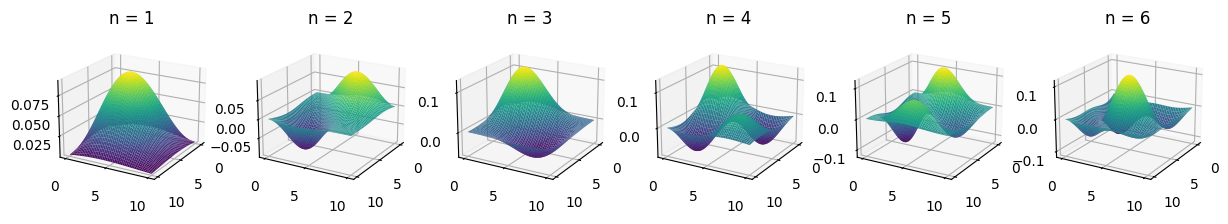

In [ ]:
import matplotlib.pyplot as plt
num_state = 6
x = np.linspace(0, L, N)
X, Y = np.meshgrid(x, x)
#
fig = plt.figure(figsize=(15, 5))
#
for state in range(6):
  eigenvector_i2 = sorted_eigenvectors2[:, state].reshape((N, N))
  eigenvector_i2 = np.sign(sorted_eigenvectors2[:, 0].reshape((N, N))) * eigenvector_i2
  #
  PSI2 = eigenvector_i2
  normalization_factor2 = np.sqrt(np.sum(np.abs(PSI2)**2) * h)
  PSI2 /= normalization_factor2
  #
  ax = fig.add_subplot(1, 6, state+1, projection='3d')
  ax.plot_surface(X, Y, PSI2, cmap='viridis')
  ax.set_title('n = 'f'{state+1}')
  ax.view_init(elev=20, azim=30)



---



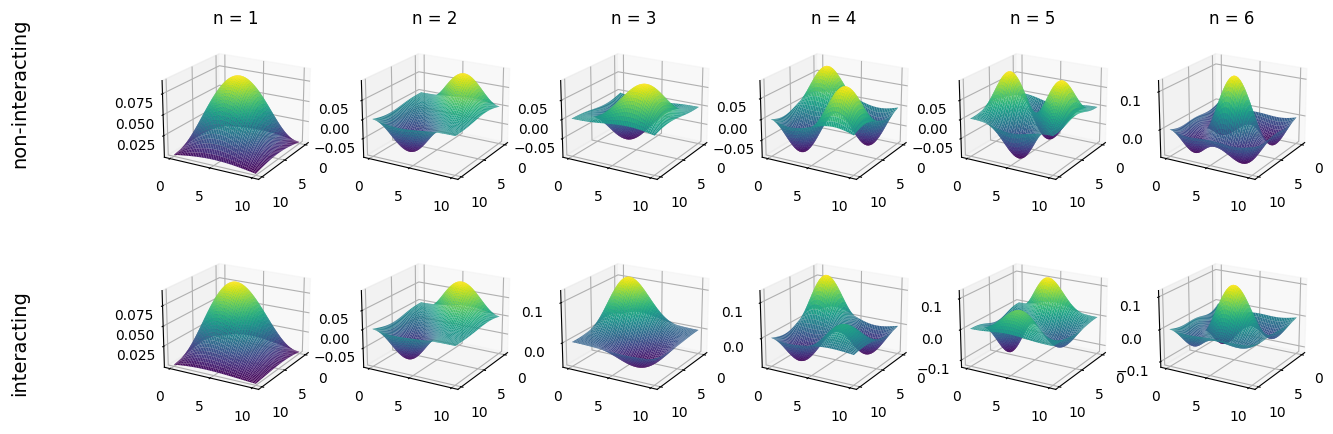

In [ ]:
import matplotlib.pyplot as plt
num_state = 6
x = np.linspace(0, L, N)
X, Y = np.meshgrid(x, x)
#
fig = plt.figure(figsize=(15, 5))
#
for state in range(6):
  eigenvector_i1 = sorted_eigenvectors1[:, state].reshape((N, N))
  eigenvector_i1 = np.sign(sorted_eigenvectors1[:, 0].reshape((N, N))) * eigenvector_i1
  PSI1 = eigenvector_i1
  normalization_factor1 = np.sqrt(np.sum(np.abs(PSI1)**2) * h)
  PSI1 /= normalization_factor1
  ax = fig.add_subplot(2, 6, state+1, projection='3d')
  ax.plot_surface(X, Y, PSI1, cmap='viridis')
  ax.set_title('n = 'f'{state+1}')
  ax.view_init(elev=20, azim=30)
  #
  eigenvector_i2 = sorted_eigenvectors2[:, state].reshape((N, N))
  eigenvector_i2 = np.sign(sorted_eigenvectors2[:, 0].reshape((N, N))) * eigenvector_i2
  #
  PSI2 = eigenvector_i2
  normalization_factor2 = np.sqrt(np.sum(np.abs(PSI2)**2) * h)
  PSI2 /= normalization_factor2
  #
  ax = fig.add_subplot(2, 6, 6+state+1, projection='3d')
  ax.plot_surface(X, Y, PSI2, cmap='viridis')
  #ax.set_title('n = 'f'{state+1}')
  ax.view_init(elev=20, azim=30)

fig.text(0.03, 0.75, 'non-interacting', va='center', rotation='vertical', fontsize=14)
fig.text(0.03, 0.25, 'interacting', va='center', rotation='vertical', fontsize=14)
plt.show()

> **The ground state remains similar**.